<a href="https://colab.research.google.com/github/Muhammad-Lutfi-2002/Data_analytics/blob/main/penduduk_miskin_berdasarkan_daerah_jabar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Section 1: Data Loading and Preprocessing

# Load the data
file_path = 'penduduk_miskin.csv'
df = pd.read_csv(file_path)

# Remove entries with zero values (potentially incomplete data)
df = df[df['persentase_penduduk'] > 0]

# Create additional features
df['urban_rural_diff'] = df.groupby('tahun')['persentase_penduduk'].transform(
    lambda x: x.max() - x.min()
)



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 19
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   18 non-null     int64  
 1   kode_provinsi        18 non-null     int64  
 2   nama_provinsi        18 non-null     object 
 3   kategori_daerah      18 non-null     object 
 4   semester             18 non-null     object 
 5   persentase_penduduk  18 non-null     float64
 6   satuan               18 non-null     object 
 7   tahun                18 non-null     int64  
 8   urban_rural_diff     18 non-null     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1.4+ KB


In [ ]:
df.head()

,id,kode_provinsi,nama_provinsi,kategori_daerah,semester,persentase_penduduk,satuan,tahun,urban_rural_diff
0,1,32,JAWA BARAT,PERKOTAAN,SEMESTER I,7.14,PERSEN,2020,3.50
1,2,32,JAWA BARAT,PERDESAAN,SEMESTER I,10.27,PERSEN,2020,3.50
2,3,32,JAWA BARAT,PERKOTAAN,SEMESTER II,7.79,PERSEN,2020,3.50
3,4,32,JAWA BARAT,PERDESAAN,SEMESTER II,10.64,PERSEN,2020,3.50
4,5,32,JAWA BARAT,PERKOTAAN,SEMESTER I,7.82,PERSEN,2021,2.98


In [9]:
# Section 2: Data Normalization

# Select features for clustering
features = ['persentase_penduduk', 'urban_rural_diff']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize selected features
normalized_data = scaler.fit_transform(df[features])


In [10]:
# Section 3: Determine Optimal Cluster Number (Elbow Method)

max_clusters=10
inertias = []
silhouette_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(normalized_data)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(normalized_data, kmeans.labels_))

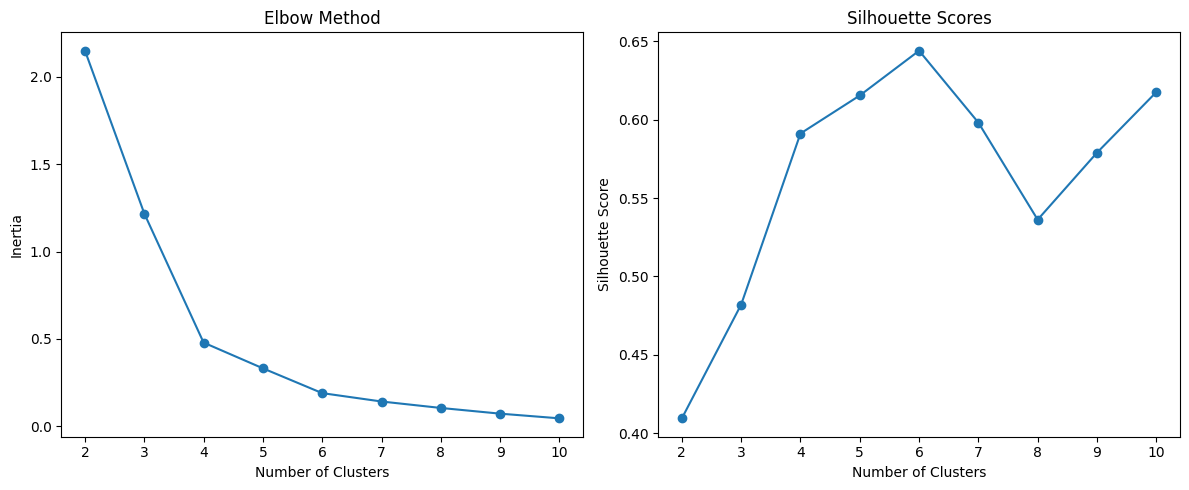

In [11]:
# Plot Elbow Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [12]:
# Section 4: Perform K-Means Clustering

n_clusters = 3
# Initialize and fit K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(normalized_data)

# Calculate evaluation metrics
silhouette = silhouette_score(normalized_data, labels)
davies_bouldin = davies_bouldin_score(normalized_data, labels)

clustering_results = {
    'labels': labels,
    'centroids': kmeans.cluster_centers_,
    'silhouette_score': silhouette,
    'davies_bouldin_score': davies_bouldin
}

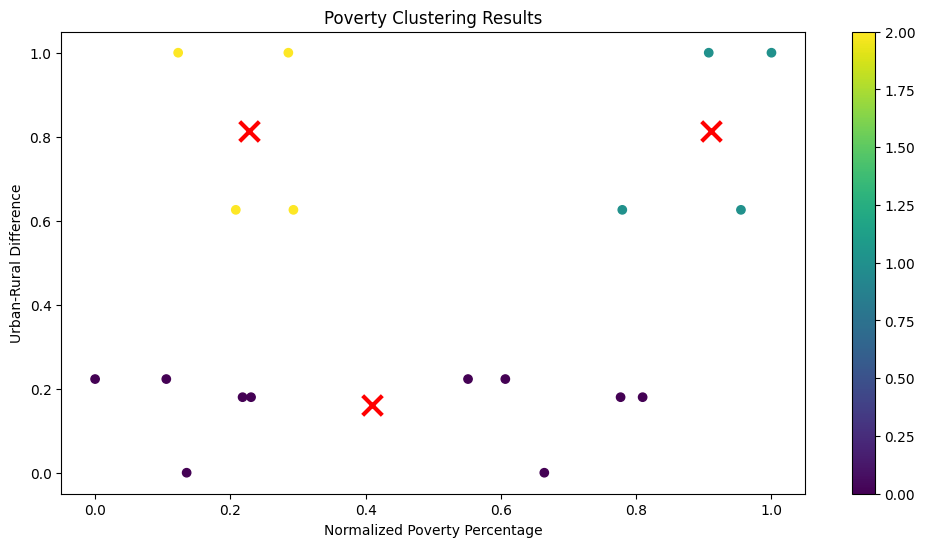

In [13]:
# Section 5: Visualization and Analysis

plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    normalized_data[:, 0],
    normalized_data[:, 1],
    c=clustering_results['labels'],
    cmap='viridis'
)
plt.scatter(
    clustering_results['centroids'][:, 0],
    clustering_results['centroids'][:, 1],
    c='red',
    marker='x',
    s=200,
    linewidths=3
)
plt.title('Poverty Clustering Results')
plt.xlabel('Normalized Poverty Percentage')
plt.ylabel('Urban-Rural Difference')
plt.colorbar(scatter)
plt.show()

In [14]:
# Detailed cluster analysis
df['cluster'] = clustering_results['labels']
cluster_summary = df.groupby('cluster').agg({
    'persentase_penduduk': ['mean', 'std'],
    'tahun': 'first',
    'kategori_daerah': 'first'
})
print("Cluster Summary:\n", cluster_summary)


Cluster Summary:
         persentase_penduduk           tahun kategori_daerah
                       mean       std first           first
cluster                                                    
0                    8.2850  1.206503  2022       PERKOTAAN
1                   10.2825  0.379682  2020       PERDESAAN
2                    7.5575  0.317949  2020       PERKOTAAN


In [15]:
# Metrics reporting
print("\nClustering Metrics:")
print(f"Silhouette Score: {clustering_results['silhouette_score']:.4f}")
print(f"Davies-Bouldin Index: {clustering_results['davies_bouldin_score']:.4f}")


Clustering Metrics:
Silhouette Score: 0.4821
Davies-Bouldin Index: 0.6746
